Dataset shape: (2996, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2996 entries, 0 to 2995
Columns: 122 entries, approved_at_utc to engagement_index
dtypes: bool(28), float64(25), int64(13), object(56)
memory usage: 2.2+ MB


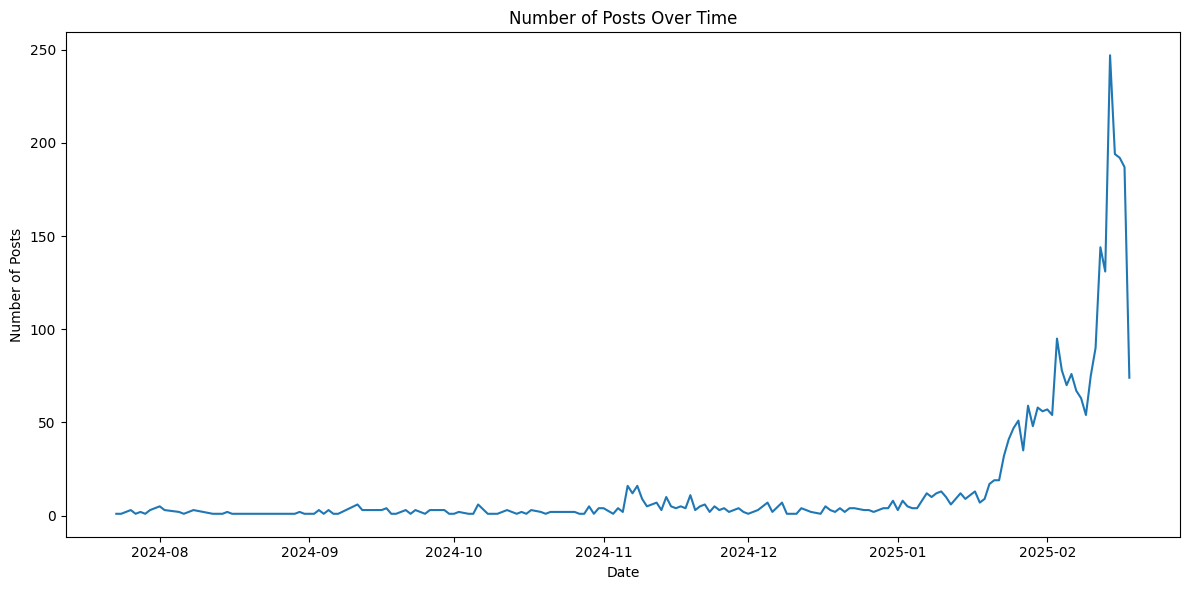

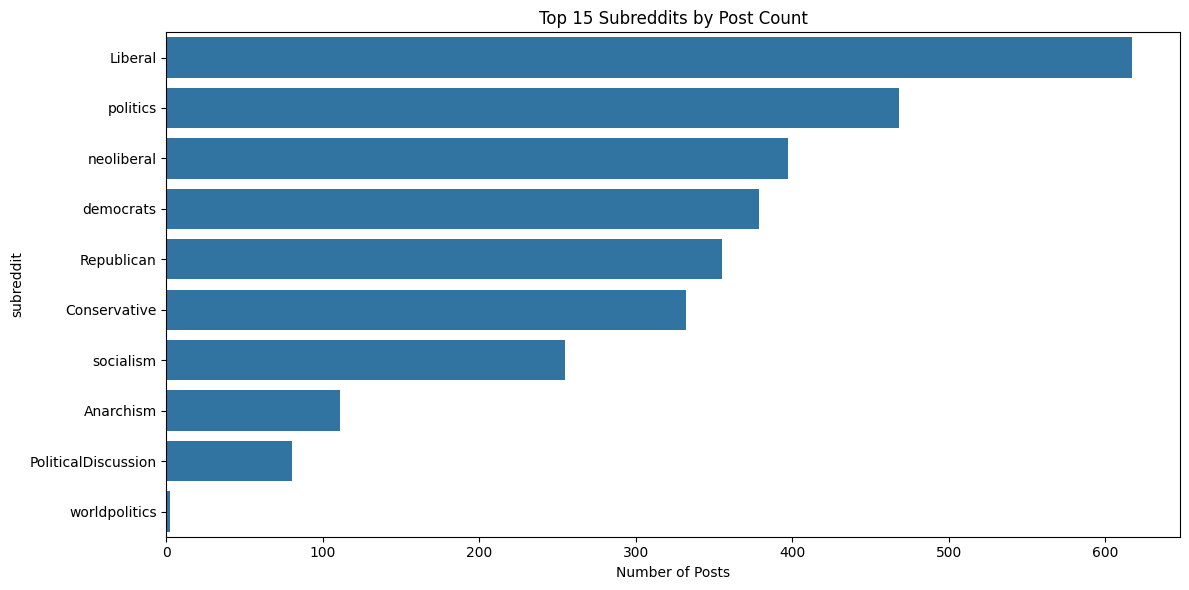

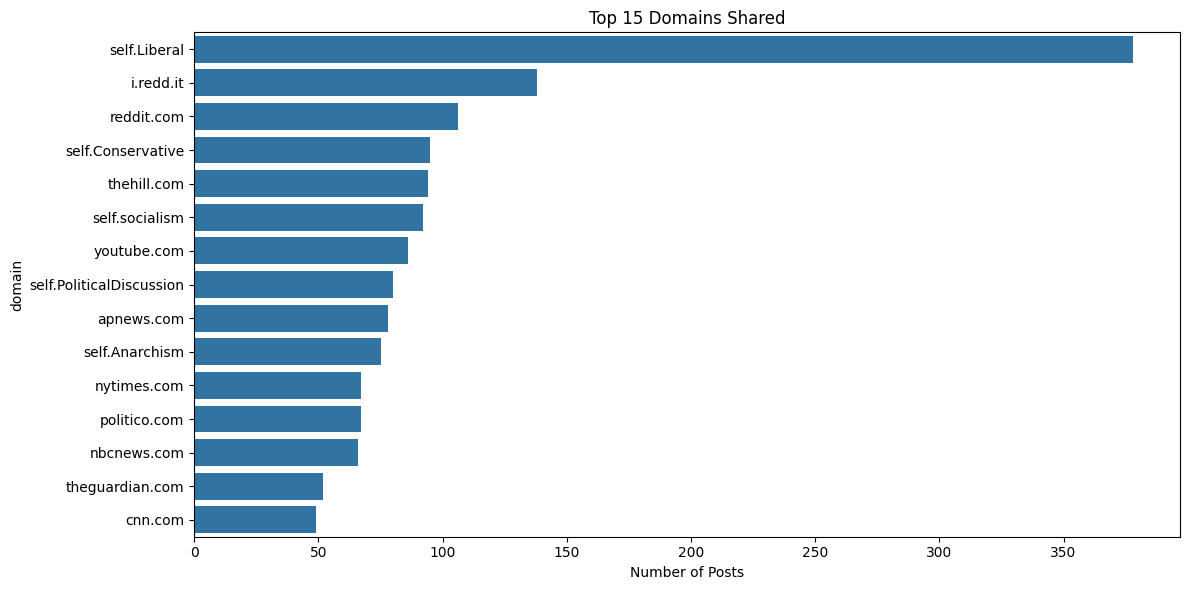

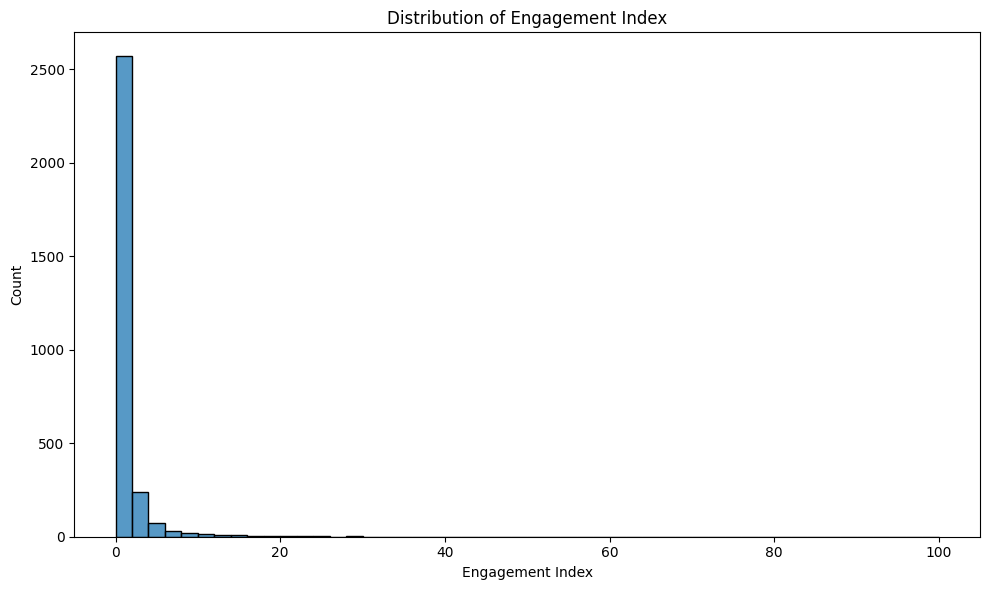

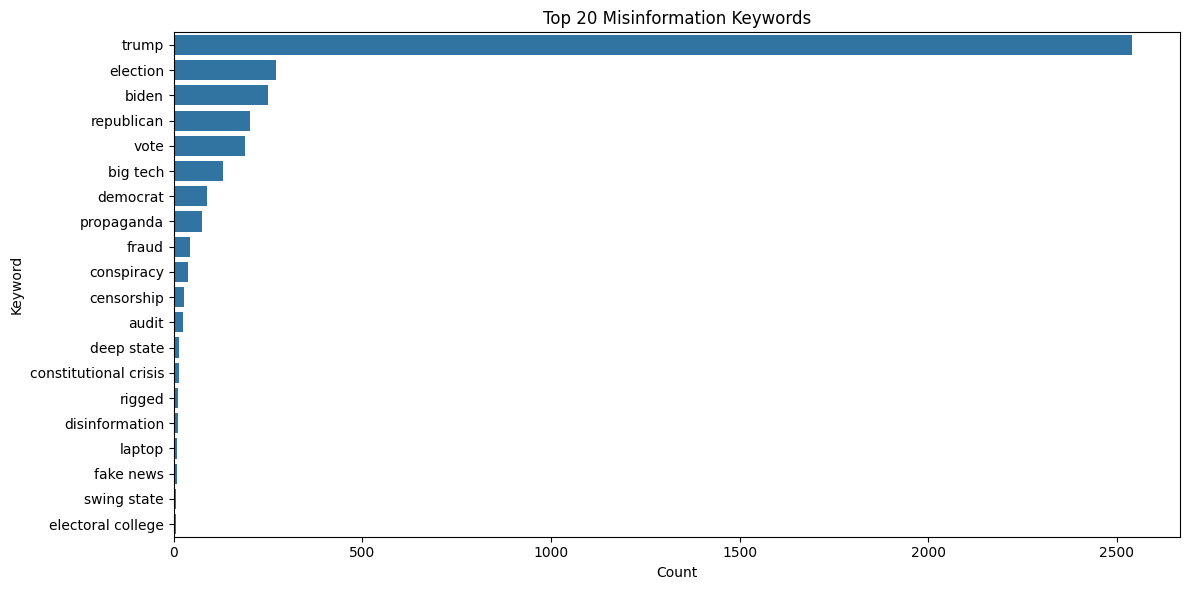

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import re
import os
import sys

# Add the project directory to the path
sys.path.append('..')

# Load processed data
df = pd.read_csv('../data/processed/cleaned_reddit_data.csv')

# Display basic information
print(f"Dataset shape: {df.shape}")
df.info()
df.head()

# Explore temporal distribution
plt.figure(figsize=(12, 6))
df['created_utc'] = pd.to_datetime(df['created_utc'])
df.groupby(df['created_utc'].dt.date).size().plot()
plt.title('Number of Posts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.tight_layout()
plt.show()

# Explore subreddit distribution
top_subreddits = df['subreddit'].value_counts().head(15)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_subreddits.values, y=top_subreddits.index)
plt.title('Top 15 Subreddits by Post Count')
plt.xlabel('Number of Posts')
plt.tight_layout()
plt.show()

# Explore domains
if 'domain' in df.columns:
    top_domains = df['domain'].value_counts().head(15)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_domains.values, y=top_domains.index)
    plt.title('Top 15 Domains Shared')
    plt.xlabel('Number of Posts')
    plt.tight_layout()
    plt.show()

# Explore engagement
plt.figure(figsize=(10, 6))
sns.histplot(df['engagement_index'], bins=50)
plt.title('Distribution of Engagement Index')
plt.xlabel('Engagement Index')
plt.tight_layout()
plt.show()

# Keyword frequency analysis
def extract_keywords(text, keywords):
    """Extract misinformation keywords from text"""
    if pd.isna(text):
        return []
    text = text.lower()
    found_keywords = []
    for keyword in keywords:
        if re.search(r'\b{}\b'.format(re.escape(keyword)), text):
            found_keywords.append(keyword)
    return found_keywords

from src.preprocessing.clean_data import get_expanded_keywords
keywords = get_expanded_keywords()

df['keywords_in_title'] = df['title'].apply(lambda x: extract_keywords(x, keywords))
df['keywords_in_selftext'] = df['selftext'].apply(lambda x: extract_keywords(x, keywords))

# Count keyword occurrences
all_keywords = []
for kw_list in df['keywords_in_title']:
    all_keywords.extend(kw_list)
for kw_list in df['keywords_in_selftext']:
    all_keywords.extend(kw_list)

keyword_counts = Counter(all_keywords)
top_keywords = pd.DataFrame(keyword_counts.most_common(20), columns=['Keyword', 'Count'])

plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Keyword', data=top_keywords)
plt.title('Top 20 Misinformation Keywords')
plt.tight_layout()
plt.show()